# Logistic Regression

* It is a classification algorithm to find target values.
* Uses Sigmoid Function

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_x = iris_df.drop('Target',axis = 1)
iris_y = iris_df['Target']
# iris_df.hist()

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(iris_x,iris_y,test_size = 0.2,random_state = 42)
model.fit(x_train,y_train)
print("Score = ",model.score(x_train,y_train)*100)
model.predict(x_test)
y_test_prediction = model.predict(x_test)
act_pred = pd.DataFrame({'actual':y_test,'predicted':y_test_prediction})
print("Accuracy Score = ",accuracy_score(y_test,y_test_prediction)*100)
model.score(x_train,y_train)*100
iris_df['Target'].value_counts()

Score =  95.83333333333334
Accuracy Score =  100.0


C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


2    50
1    50
0    50
Name: Target, dtype: int64

C:\Users\APSSDC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\APSSDC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


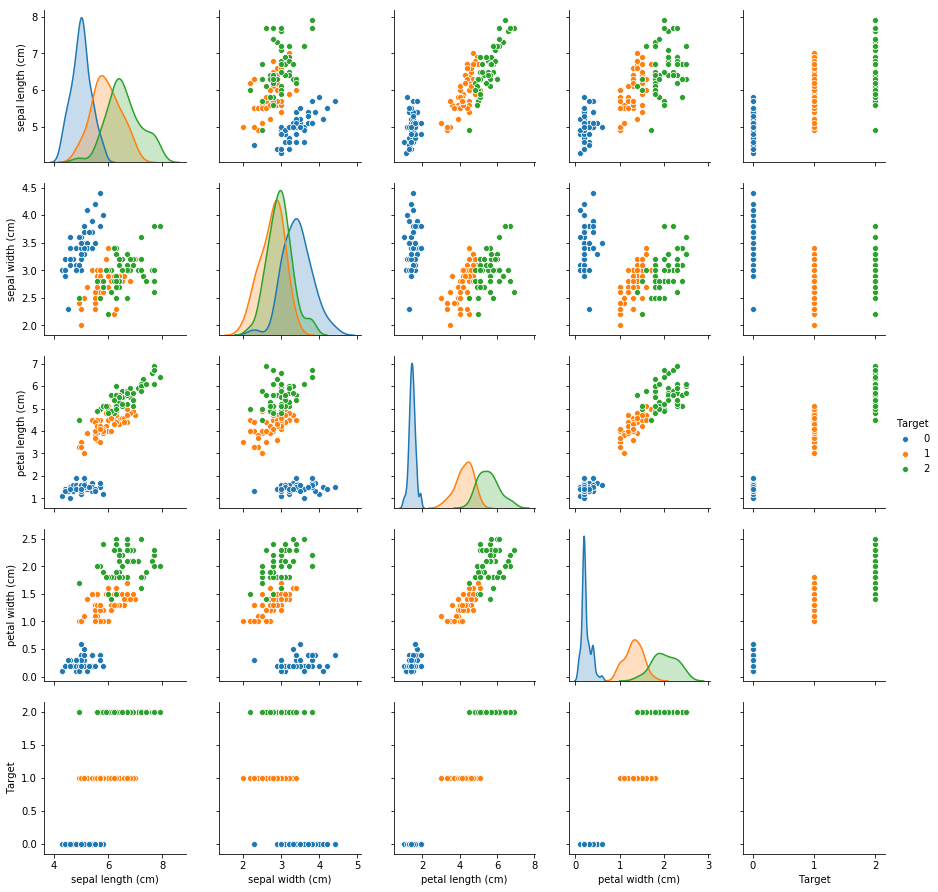

In [6]:
sns.pairplot(iris_df,hue = 'Target')

## Data preprocessing

It is a technique that cleans the data to yield better results

### Data Problems

* Insufficient Data
* Too much Data
* Duplicate Values
* Missing Values
* outliers

#### Missing values

In [34]:
data = np.array([[10,np.nan,11,12,np.nan],
                 [12,13,14,40,20],
                 [13,89,95,68,33],
                 [np.nan,23,np.nan,5,54],
                 [12,np.nan,67,98,np.nan]
                ])
df = pd.DataFrame(data,columns = ['A','B','C','D','E'])
print("Actual Data Frame -- \n\n",df)
print("\nfillna(56565) -- \n\n",df.fillna(56565))
print("\ndropna() -- \n\n",df.dropna())
print("\nFilling each column with their mean -- \n")
df['A'] = df['A'].fillna(df['A'].mean())
df['B'] = df['B'].fillna(df['B'].mean())
df['C'] = df['C'].fillna(df['C'].mean())
df['D'] = df['D'].fillna(method = 'ffill')
df['E'] = df['E'].replace(np.nan,df['E'].mean())
df

Actual Data Frame -- 

       A     B     C     D     E
0  10.0   NaN  11.0  12.0   NaN
1  12.0  13.0  14.0  40.0  20.0
2  13.0  89.0  95.0  68.0  33.0
3   NaN  23.0   NaN   5.0  54.0
4  12.0   NaN  67.0  98.0   NaN

fillna(56565) -- 

          A        B        C     D        E
0     10.0  56565.0     11.0  12.0  56565.0
1     12.0     13.0     14.0  40.0     20.0
2     13.0     89.0     95.0  68.0     33.0
3  56565.0     23.0  56565.0   5.0     54.0
4     12.0  56565.0     67.0  98.0  56565.0

dropna() -- 

       A     B     C     D     E
1  12.0  13.0  14.0  40.0  20.0
2  13.0  89.0  95.0  68.0  33.0

Filling each column with their mean -- 



,A,B,C,D,E
0,10.00,41.666667,11.00,12.0,35.666667
1,12.00,13.000000,14.00,40.0,20.000000
2,13.00,89.000000,95.00,68.0,33.000000
3,11.75,23.000000,46.75,5.0,54.000000
4,12.00,41.666667,67.00,98.0,35.666667


In [35]:
# dir(df)

## Filling missing values using scikit learn

simpleImputer

In [41]:
data = np.array([[10,np.nan,11,12,np.nan],
                 [12,13,14,40,20],
                 [13,89,95,68,33],
                 [np.nan,23,np.nan,5,54],
                 [12,np.nan,67,98,np.nan]
                ])
df = pd.DataFrame(data,columns = ['A','B','C','D','E'])
df

,A,B,C,D,E
0,10.0,NaN,11.0,12.0,NaN
1,12.0,13.0,14.0,40.0,20.0
2,13.0,89.0,95.0,68.0,33.0
3,NaN,23.0,NaN,5.0,54.0
4,12.0,NaN,67.0,98.0,NaN


In [54]:
from sklearn.impute import SimpleImputer 

si = SimpleImputer(strategy = 'constant',fill_value = 99)
si_data = si.fit_transform(df)

si_df = pd.DataFrame(si_data,columns = df.columns)
si_df

,A,B,C,D,E
0,10.0,99.0,11.0,12.0,99.0
1,12.0,13.0,14.0,40.0,20.0
2,13.0,89.0,95.0,68.0,33.0
3,99.0,23.0,99.0,5.0,54.0
4,12.0,99.0,67.0,98.0,99.0
